# Gener Classification - Binary Classification

**Author: Himanshu Atri**

*dataset link:- https://www.kaggle.com/datasets/playlist/men-women-classification*


Welcome to this notebook on binary classification of men and women using a custom Convolutional Neural Network (CNN) architecture. Our objective is to accurately distinguish between images of men and women based on their facial features. We will preprocess the dataset, design a tailored CNN model, and fine-tune its hyperparameters to optimize performance. Finally, we will evaluate the model using appropriate metrics to ensure its accuracy. Let's embark on this deep learning journey to classify images effectively!

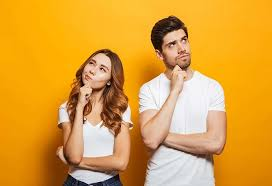

# Importing Neccessary Libraries

In [3]:
import numpy as np
import os
import imghdr
import matplotlib.pyplot as plt
import cv2
from tensorflow  import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report
from google.colab import drive

# Downloading the Dataset

In [4]:
!kaggle datasets download -d playlist/men-women-classification

Dataset URL: https://www.kaggle.com/datasets/playlist/men-women-classification
License(s): copyright-authors
men-women-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip /content/men-women-classification.zip

Archive:  /content/men-women-classification.zip
replace data/men/00000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
dir = "/content/data"
men_dir = '/content/data/men'
women_dir = '/content/data/women'

# Data Cleaning and processing

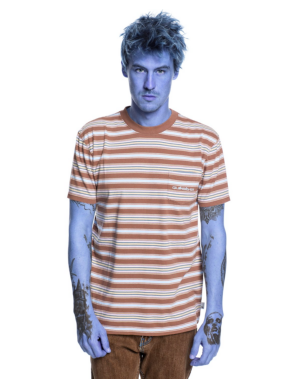

In [7]:
temp_img = cv2.imread('/content/data/men/00000001.jpg')
plt.imshow(temp_img)
plt.axis("off")
plt.show()

In [8]:
men_imgs = os.listdir(men_dir)
women_imgs = os.listdir(women_dir)

print(f"The number of images in men directory is {len(men_imgs)}.\nThe number of images in women directory is {len(women_imgs)}.")

The number of images in men directory is 1418.
The number of images in women directory is 1912.


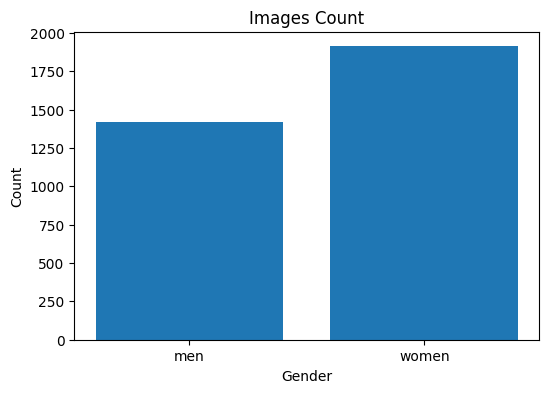

In [9]:
plt.figure(figsize=(6, 4))
plt.bar(['men', 'women'], [len(men_imgs), len(women_imgs)])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Images Count")
plt.show()

In [10]:
valid_img_formats = ['jpg', 'jpeg', 'png']

for root, dirs, files in os.walk(dir):
  for file in files:
    img_path = os.path.join(root, file)
    if imghdr.what(img_path) not in valid_img_formats:
      os.remove(img_path)

In [11]:
men_imgs = os.listdir(men_dir)
women_imgs = os.listdir(women_dir)

print(f"The number of images in men directory is {len(men_imgs)}.\nThe number of images in women directory is {len(women_imgs)}.")

The number of images in men directory is 1352.
The number of images in women directory is 1820.


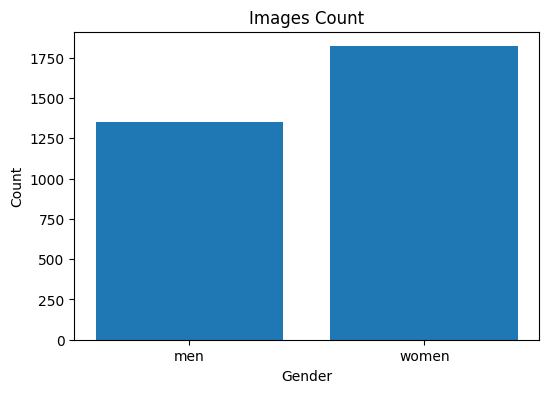

In [12]:
plt.figure(figsize=(6, 4))
plt.bar(['men', 'women'], [len(men_imgs), len(women_imgs)])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Images Count")
plt.show()

In [19]:
img_data = []
labels = []

for img1_path, img2_path in zip(men_imgs, women_imgs):
  man_img_path = os.path.join(men_dir, img1_path)
  man_img = cv2.imread(man_img_path)
  man_img = cv2.resize(man_img, (224, 224))
  man_img = np.array(man_img, dtype=np.float32) / 255.0

  img_data.append(man_img)
  labels.append(0)

  woman_img_path = os.path.join(women_dir, img2_path)
  woman_img = cv2.imread(woman_img_path)
  woman_img = cv2.resize(woman_img, (224, 224))
  woman_img = np.array(woman_img, dtype=np.float32) / 255.0

  img_data.append(woman_img)
  labels.append(1)

img_data = np.array(img_data, dtype = np.float32)
labels = np.array(labels)

In [14]:
img_data.shape, labels.shape

((2704, 224, 224, 3), (2704,))

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(img_data, labels, test_size=0.2, random_state = 2)

In [16]:
# datagen = ImageDataGenerator(
#     rescale = (1./255),
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     validation_split=0.2)

In [17]:
# train_datagen = datagen.flow_from_directory(
#     dir,
#     target_size = (224, 224),
#     class_mode = 'binary',
#     batch_size = 32,
#     subset = 'training'
# )

# test_datagen = datagen.flow_from_directory(
#     dir,
#     target_size= (224, 224),
#     class_mode = 'binary',
#     batch_size = 32,
#     subset = 'validation'
# )

# CNN Architecture

In [22]:
model = Sequential()

model.add(Input(shape = (224, 224, 3)))

model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation='relu'))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,690,753 (21.71 MB)

 Trainable params: 5,689,345 (21.70 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [24]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['Accuracy'])

In [25]:
class_weights  = compute_class_weight(class_weight='balanced', classes = np.unique(Y_train), y = Y_train)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 1.0023169601482855, 1: 0.9976937269372693}

In [27]:
path = 'Content/gender_detector.keras'
model_checkpoint = ModelCheckpoint(
    filepath = path,
    monitor = "val_loss",
    verbose = 1,
    save_best_only = True,
    save_weights_only = False,
    mode = 'min',
    save_freq = 'epoch'
)

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    verbose = 1,
    mode = "min",
    restore_best_weights=True
)

# Training the Model

In [28]:
history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    epochs = 50,
    class_weight = class_weights_dict,
    callbacks= [model_checkpoint, early_stopping]
)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - Accuracy: 0.5688 - loss: 2.0889
Epoch 1: val_loss improved from inf to 2.08029, saving model to Content/gender_detector.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 47s 440ms/step - Accuracy: 0.5686 - loss: 2.0886 - val_Accuracy: 0.4898 - val_loss: 2.0803
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - Accuracy: 0.5538 - loss: 1.5357
Epoch 2: val_loss improved from 2.08029 to 0.97442, saving model to Content/gender_detector.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - Accuracy: 0.5538 - loss: 1.5335 - val_Accuracy: 0.5360 - val_loss: 0.9744
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - Accuracy: 0.6037 - loss: 0.9464
Epoch 3: val_loss improved from 0.97442 to 0.95009, saving model to Content/gender_detector.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - Accuracy: 0.6038 - loss: 0.9454 - val_Accuracy: 0.5083 - val_loss: 0.9501
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - Accuracy: 0.6431 - loss: 0.7429
Epoch 4: val

# Accuracy and Training Graph

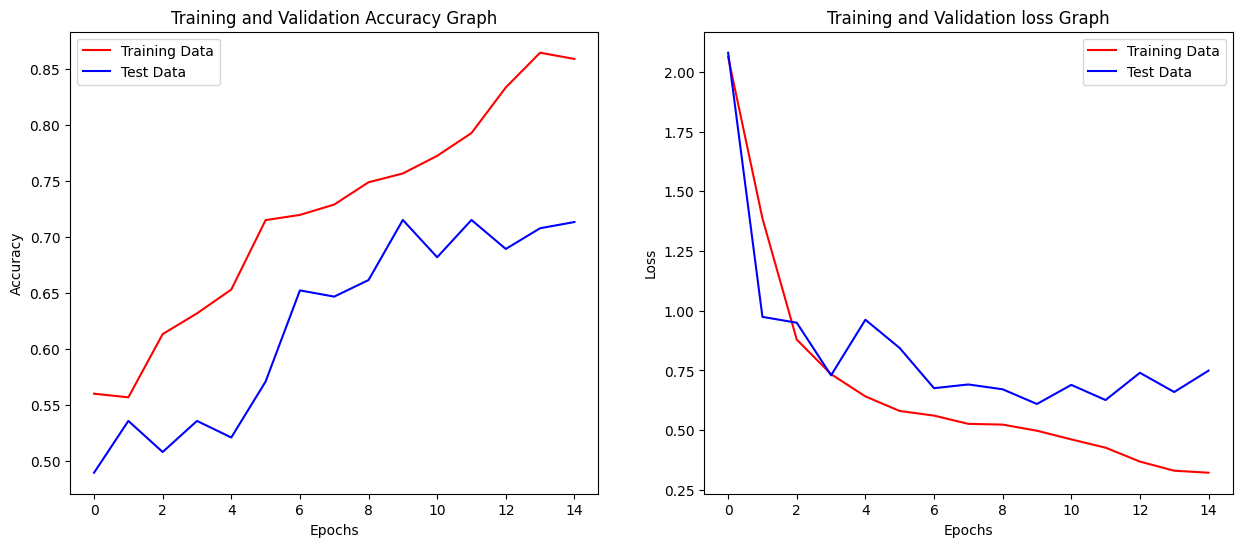

In [29]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(history.history['Accuracy'], color='r', label="Training Data")
plt.plot(history.history['val_Accuracy'], color='b', label="Test Data")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy Graph")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='r', label="Training Data")
plt.plot(history.history['val_loss'], color='b', label="Test Data")
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation loss Graph")

plt.show()

# Model Evaluation

In [30]:
# test_ds = []
# label_ds = []
# men_rand_ind = np.random.choice(range(0, len(men_imgs)), size=1000, replace=False)
# women_rand_ind = np.random.choice(range(0, len(women_imgs)), size=1000, replace=False)
# for men_ind, women_ind in zip(men_rand_ind, women_rand_ind):
#   #for men
#   men_img_name = men_imgs[men_ind]
#   men_img_path = os.path.join(dir, 'men', men_img_name)
#   men_img = cv2.imread(men_img_path)
#   men_img = cv2.resize(men_img, (224, 224))
#   men_img = men_img/255.0
#   test_ds.append(men_img)
#   label_ds.append(1)

#   #for women
#   women_img_name = women_imgs[women_ind]
#   women_img_path = os.path.join(dir, 'women', women_img_name)
#   women_img = cv2.imread(women_img_path)
#   women_img = cv2.resize(women_img, (224, 224))
#   women_img = women_img/255.0
#   test_ds.append(women_img)
#   label_ds.append(0)

# test_ds = np.array(test_ds, dtype=np.float32)
# label_ds = np.array(label_ds, dtype=np.int32)
# test_ds.shape, label_ds.shape

In [31]:
predictions = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [32]:
# Extract predicted labels from the prediction
prediction_list = []

for pred in predictions:
    prediction_list.append(int(np.round(pred[0])))

prediction_list = np.array(prediction_list, dtype=np.int32)
prediction_list.shape

(541,)

In [33]:
# Generate the classification report
report = classification_report(Y_test, prediction_list, target_names=['Men', 'Women'])
print(report)

              precision    recall  f1-score   support

         Men       0.69      0.79      0.74       273
       Women       0.75      0.63      0.69       268

    accuracy                           0.72       541
   macro avg       0.72      0.71      0.71       541
weighted avg       0.72      0.72      0.71       541



# Testing on Random Images

In [44]:
def predict_gender(img_path):
    img = cv2.imread(img_path)
    img_resize = cv2.resize(img, (224, 224))
    img_resize = np.array(img_resize, dtype=np.float32)
    img_resize /= 255.0
    img_input = img_resize.reshape(1, 224, 224, 3)
    prediction = model.predict(img_input)

    if prediction[0][0] < 0.5:
        title = "He is a Men."
    else:
        title = "She is a Women."

    plt.figure(figsize=(3, 2))
    plt.axis("off")
    plt.title(title)
    plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


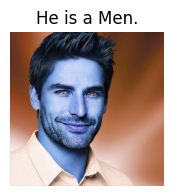

In [45]:
predict_gender('/content/data/men/00000009.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


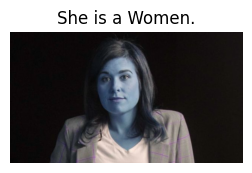

In [46]:
predict_gender('/content/data/women/00000102.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


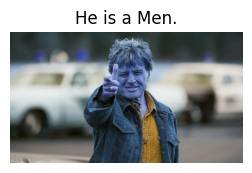

In [47]:
predict_gender('/content/data/men/00001101.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


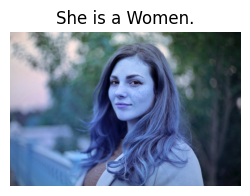

In [48]:
predict_gender('/content/data/women/00000005.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


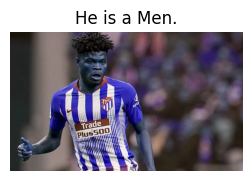

In [49]:
predict_gender('/content/data/men/00001153.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


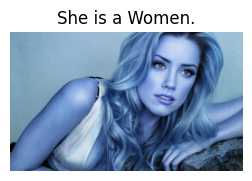

In [52]:
predict_gender('/content/data/women/00000851.jpg')

# Uploading the Model on Drive

In [51]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
# Define the path where you want to save the model in your Google Drive
model_save_path = '/content/drive/MyDrive/Image_classification/gender_detector.keras'

# Save your trained model to the specified path
model.save(model_save_path)

In [53]:
# Unmount Google Drive
drive.flush_and_unmount()